# ***Section Clinical State Binary Classification***

This notebook shows the process of classification section samples into binary clinical state (high grade, low grade).

### ***Import packages***

Before we begin, let's import all the necessary packages for this notebook:

In [1]:
import gc
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from typing import Tuple
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks
from tensorflow.keras import backend as K
from sklearn import metrics
from sklearn.model_selection import train_test_split
from skimage import (filters)
from tqdm import tqdm
from pyimzml.ImzMLParser import ImzMLParser, getionimage

### ***Constants definitions***

Next, let's define some constant variables for this notebook:

In [2]:
# Define folder that contains the dataset and files
DHG_PATH = "C:/Users/Leor/Desktop/Thesis/DHG"
# Define folder that contains lower dimension data
DATA_IN_PATH = f"{DHG_PATH}/Dimension_Reduction"

In [3]:
tissue_df = pd.read_csv(f"{DATA_IN_PATH}/section-tissue.csv")
non_tissue_df = pd.read_csv(f"{DATA_IN_PATH}/section-non-tissue.csv")

In [7]:
from pandas_profiling import ProfileReport
from sklearn.linear_model import LogisticRegression


ProfileReport(tissue_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### ***Leave one sample out classification:***

Next, let"s create a classification model for each leave one sample out option:

In [34]:
def get_model() -> tf.keras.Model:
  """Function to generate classification model.

  Returns:
      tf.keras.Model: classification model.
  
  """
  return tf.keras.Sequential(
    [
      layers.InputLayer(input_shape=(5,)),
      layers.Dropout(0.5),
      layers.Dense(10),
      layers.ReLU(),
      layers.BatchNormalization(),
      layers.Dropout(0.5),
      layers.Dense(10),
      layers.ReLU(),
      layers.BatchNormalization(),
      layers.Dropout(0.5),
      layers.Dense(5),
      layers.ReLU(),
      layers.BatchNormalization(),
      layers.Dropout(0.5),
      layers.Dense(1, activation='sigmoid')
    ]
  )

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Define dict for saving predictions and true labels
predictions = {}
true_labels = {}

# Loop over each sample number
for exclude_sample in tqdm(np.unique(tissue_df.sample_number)):
  # Clear graph
  K.clear_session()
  gc.collect()

  # Create filter for training data - does not include the excluded sample
  # and only include tissue spectra's
  train_filter = (tissue_df.sample_number != exclude_sample)

  #
  train_x = tissue_df.loc[train_filter, ["F0", "F1", "F2", "F3", "F4"]]
  train_y = (tissue_df.loc[train_filter, "who_grade"] > 2).astype(int)
  test_x = tissue_df.loc[~train_filter, ["F0", "F1", "F2", "F3", "F4"]]
  test_y = (tissue_df.loc[~train_filter, "who_grade"] > 2).astype(int)

  #
  t = StandardScaler()
  train_x = t.fit_transform(train_x)
  test_x = t.transform(test_x)


  #
  clf = get_model()
  clf.compile(optimizer=optimizers.Adam(0.0001), loss=losses.BinaryCrossentropy())
  clf.fit(train_x, train_y, batch_size=32, epochs=10)

  #
  predictions[exclude_sample] = clf.predict(test_x)
  true_labels[exclude_sample] = test_y

  0%|          | 0/22 [00:00<?, ?it/s]

Epoch 1/10
833/833 [==============================] - 4s 4ms/step - loss: 0.9377
Epoch 2/10
833/833 [==============================] - 3s 4ms/step - loss: 0.8477
Epoch 3/10
833/833 [==============================] - 3s 4ms/step - loss: 0.7962
Epoch 4/10
833/833 [==============================] - 3s 4ms/step - loss: 0.7581
Epoch 5/10
833/833 [==============================] - 3s 4ms/step - loss: 0.7277
Epoch 6/10
833/833 [==============================] - 3s 4ms/step - loss: 0.7106
Epoch 7/10
833/833 [==============================] - 3s 4ms/step - loss: 0.6968
Epoch 8/10
833/833 [==============================] - 3s 4ms/step - loss: 0.6823
Epoch 9/10
833/833 [==============================] - 3s 3ms/step - loss: 0.6760
Epoch 10/10
833/833 [==============================] - 3s 3ms/step - loss: 0.6663


  5%|▍         | 1/22 [00:31<11:07, 31.79s/it]

Epoch 1/10
824/824 [==============================] - 4s 4ms/step - loss: 0.8114
Epoch 2/10
824/824 [==============================] - 3s 4ms/step - loss: 0.7586
Epoch 3/10
824/824 [==============================] - 3s 4ms/step - loss: 0.7311
Epoch 4/10
824/824 [==============================] - 3s 4ms/step - loss: 0.7083
Epoch 5/10
824/824 [==============================] - 3s 4ms/step - loss: 0.6959
Epoch 6/10
824/824 [==============================] - 3s 4ms/step - loss: 0.6856
Epoch 7/10
824/824 [==============================] - 3s 4ms/step - loss: 0.6806
Epoch 8/10
824/824 [==============================] - 3s 4ms/step - loss: 0.6757
Epoch 9/10
824/824 [==============================] - 4s 5ms/step - loss: 0.6716
Epoch 10/10
824/824 [==============================] - 3s 4ms/step - loss: 0.6690


  9%|▉         | 2/22 [01:04<10:47, 32.38s/it]

Epoch 1/10
828/828 [==============================] - 4s 4ms/step - loss: 0.9530
Epoch 2/10
828/828 [==============================] - 3s 4ms/step - loss: 0.8794
Epoch 3/10
828/828 [==============================] - 3s 4ms/step - loss: 0.8058
Epoch 4/10
828/828 [==============================] - 3s 4ms/step - loss: 0.7725
Epoch 5/10
828/828 [==============================] - 3s 4ms/step - loss: 0.7500
Epoch 6/10
828/828 [==============================] - 3s 4ms/step - loss: 0.7249
Epoch 7/10
828/828 [==============================] - 3s 4ms/step - loss: 0.7106
Epoch 8/10
828/828 [==============================] - 3s 3ms/step - loss: 0.6981
Epoch 9/10
828/828 [==============================] - 3s 4ms/step - loss: 0.6901
Epoch 10/10
828/828 [==============================] - 3s 3ms/step - loss: 0.6817


 14%|█▎        | 3/22 [01:36<10:07, 31.96s/it]

Epoch 1/10
837/837 [==============================] - 4s 3ms/step - loss: 0.9176
Epoch 2/10
837/837 [==============================] - 3s 4ms/step - loss: 0.8325
Epoch 3/10
837/837 [==============================] - 3s 4ms/step - loss: 0.7879
Epoch 4/10
837/837 [==============================] - 3s 3ms/step - loss: 0.7482
Epoch 5/10
837/837 [==============================] - 3s 3ms/step - loss: 0.7252
Epoch 6/10
837/837 [==============================] - 3s 3ms/step - loss: 0.7082
Epoch 7/10
837/837 [==============================] - 3s 4ms/step - loss: 0.6958
Epoch 8/10
837/837 [==============================] - 3s 4ms/step - loss: 0.6887
Epoch 9/10
837/837 [==============================] - 3s 4ms/step - loss: 0.6808
Epoch 10/10
837/837 [==============================] - 3s 4ms/step - loss: 0.6750


 18%|█▊        | 4/22 [02:07<09:28, 31.58s/it]

Epoch 1/10
835/835 [==============================] - 4s 4ms/step - loss: 0.9124
Epoch 2/10
835/835 [==============================] - 3s 3ms/step - loss: 0.8602
Epoch 3/10
835/835 [==============================] - 3s 4ms/step - loss: 0.8113
Epoch 4/10
835/835 [==============================] - 3s 4ms/step - loss: 0.7673
Epoch 5/10
835/835 [==============================] - 3s 4ms/step - loss: 0.7392
Epoch 6/10
835/835 [==============================] - 3s 4ms/step - loss: 0.7218
Epoch 7/10
835/835 [==============================] - 3s 4ms/step - loss: 0.7064
Epoch 8/10
835/835 [==============================] - 3s 4ms/step - loss: 0.6922
Epoch 9/10
835/835 [==============================] - 3s 4ms/step - loss: 0.6844
Epoch 10/10
835/835 [==============================] - 3s 4ms/step - loss: 0.6782


 23%|██▎       | 5/22 [02:38<08:57, 31.65s/it]

Epoch 1/10
834/834 [==============================] - 4s 4ms/step - loss: 0.8306
Epoch 2/10
834/834 [==============================] - 3s 4ms/step - loss: 0.7852
Epoch 3/10
834/834 [==============================] - 3s 4ms/step - loss: 0.7438
Epoch 4/10
834/834 [==============================] - 3s 4ms/step - loss: 0.7225
Epoch 5/10
834/834 [==============================] - 3s 4ms/step - loss: 0.7102
Epoch 6/10
834/834 [==============================] - 3s 4ms/step - loss: 0.6980
Epoch 7/10
834/834 [==============================] - 3s 4ms/step - loss: 0.6876
Epoch 8/10
834/834 [==============================] - 3s 4ms/step - loss: 0.6814
Epoch 9/10
834/834 [==============================] - 3s 4ms/step - loss: 0.6808
Epoch 10/10
834/834 [==============================] - 3s 4ms/step - loss: 0.6750


 27%|██▋       | 6/22 [03:10<08:28, 31.80s/it]

Epoch 1/10
788/788 [==============================] - 4s 4ms/step - loss: 0.8960
Epoch 2/10
788/788 [==============================] - 3s 4ms/step - loss: 0.8372
Epoch 3/10
788/788 [==============================] - 3s 4ms/step - loss: 0.8081
Epoch 4/10
788/788 [==============================] - 3s 4ms/step - loss: 0.7725
Epoch 5/10
788/788 [==============================] - 3s 4ms/step - loss: 0.7466
Epoch 6/10
788/788 [==============================] - 3s 4ms/step - loss: 0.7329
Epoch 7/10
788/788 [==============================] - 3s 4ms/step - loss: 0.7141
Epoch 8/10
788/788 [==============================] - 3s 4ms/step - loss: 0.7014
Epoch 9/10
788/788 [==============================] - 3s 4ms/step - loss: 0.6981
Epoch 10/10
788/788 [==============================] - 3s 4ms/step - loss: 0.6887


 32%|███▏      | 7/22 [03:41<07:50, 31.37s/it]

Epoch 1/10
834/834 [==============================] - 4s 4ms/step - loss: 0.8467
Epoch 2/10
834/834 [==============================] - 3s 4ms/step - loss: 0.7898
Epoch 3/10
834/834 [==============================] - 3s 4ms/step - loss: 0.7515
Epoch 4/10
834/834 [==============================] - 3s 4ms/step - loss: 0.7238
Epoch 5/10
834/834 [==============================] - 3s 4ms/step - loss: 0.7050
Epoch 6/10
834/834 [==============================] - 3s 4ms/step - loss: 0.6961
Epoch 7/10
834/834 [==============================] - 3s 4ms/step - loss: 0.6896
Epoch 8/10
834/834 [==============================] - 3s 4ms/step - loss: 0.6843
Epoch 9/10
834/834 [==============================] - 3s 4ms/step - loss: 0.6796
Epoch 10/10
834/834 [==============================] - 3s 4ms/step - loss: 0.6759


 36%|███▋      | 8/22 [04:13<07:22, 31.64s/it]

Epoch 1/10
826/826 [==============================] - 3s 3ms/step - loss: 0.8907
Epoch 2/10
826/826 [==============================] - 3s 3ms/step - loss: 0.8148
Epoch 3/10
826/826 [==============================] - 3s 3ms/step - loss: 0.7718
Epoch 4/10
826/826 [==============================] - 3s 4ms/step - loss: 0.7419
Epoch 5/10
826/826 [==============================] - 3s 3ms/step - loss: 0.7196
Epoch 6/10
826/826 [==============================] - 3s 3ms/step - loss: 0.7049
Epoch 7/10
826/826 [==============================] - 3s 3ms/step - loss: 0.6943
Epoch 8/10
826/826 [==============================] - 3s 3ms/step - loss: 0.6851
Epoch 9/10
826/826 [==============================] - 4s 5ms/step - loss: 0.6785
Epoch 10/10
826/826 [==============================] - 3s 4ms/step - loss: 0.6769


 41%|████      | 9/22 [04:43<06:45, 31.21s/it]

Epoch 1/10
800/800 [==============================] - 4s 4ms/step - loss: 0.9642
Epoch 2/10
800/800 [==============================] - 3s 4ms/step - loss: 0.8792
Epoch 3/10
800/800 [==============================] - 3s 4ms/step - loss: 0.8039
Epoch 4/10
800/800 [==============================] - 3s 4ms/step - loss: 0.7756
Epoch 5/10
800/800 [==============================] - 3s 4ms/step - loss: 0.7457
Epoch 6/10
800/800 [==============================] - 3s 4ms/step - loss: 0.7368
Epoch 7/10
800/800 [==============================] - 3s 4ms/step - loss: 0.7221
Epoch 8/10
800/800 [==============================] - 3s 4ms/step - loss: 0.7038
Epoch 9/10
800/800 [==============================] - 3s 4ms/step - loss: 0.6955
Epoch 10/10
800/800 [==============================] - 3s 4ms/step - loss: 0.6928


 45%|████▌     | 10/22 [05:14<06:12, 31.06s/it]

Epoch 1/10
771/771 [==============================] - 3s 4ms/step - loss: 0.8538
Epoch 2/10
771/771 [==============================] - 3s 3ms/step - loss: 0.8066
Epoch 3/10
771/771 [==============================] - 3s 4ms/step - loss: 0.7783
Epoch 4/10
771/771 [==============================] - 3s 4ms/step - loss: 0.7576
Epoch 5/10
771/771 [==============================] - 3s 3ms/step - loss: 0.7382
Epoch 6/10
771/771 [==============================] - 3s 4ms/step - loss: 0.7230
Epoch 7/10
771/771 [==============================] - 3s 4ms/step - loss: 0.7112
Epoch 8/10
771/771 [==============================] - 3s 4ms/step - loss: 0.7021
Epoch 9/10
771/771 [==============================] - 3s 3ms/step - loss: 0.6971
Epoch 10/10
771/771 [==============================] - 3s 3ms/step - loss: 0.6943


 50%|█████     | 11/22 [05:42<05:31, 30.13s/it]

Epoch 1/10
817/817 [==============================] - 3s 3ms/step - loss: 0.8996
Epoch 2/10
817/817 [==============================] - 2s 3ms/step - loss: 0.8466
Epoch 3/10
817/817 [==============================] - 3s 3ms/step - loss: 0.7942
Epoch 4/10
817/817 [==============================] - 3s 3ms/step - loss: 0.7632
Epoch 5/10
817/817 [==============================] - 3s 3ms/step - loss: 0.7398
Epoch 6/10
817/817 [==============================] - 3s 4ms/step - loss: 0.7183
Epoch 7/10
817/817 [==============================] - 3s 4ms/step - loss: 0.7045
Epoch 8/10
817/817 [==============================] - 3s 3ms/step - loss: 0.6944
Epoch 9/10
817/817 [==============================] - 3s 4ms/step - loss: 0.6892
Epoch 10/10
817/817 [==============================] - 3s 4ms/step - loss: 0.6816


 55%|█████▍    | 12/22 [06:11<04:57, 29.77s/it]

Epoch 1/10
793/793 [==============================] - 3s 4ms/step - loss: 0.9276
Epoch 2/10
793/793 [==============================] - 3s 4ms/step - loss: 0.8541
Epoch 3/10
793/793 [==============================] - 3s 3ms/step - loss: 0.8053
Epoch 4/10
793/793 [==============================] - 3s 3ms/step - loss: 0.7704
Epoch 5/10
793/793 [==============================] - 3s 3ms/step - loss: 0.7434
Epoch 6/10
793/793 [==============================] - 3s 4ms/step - loss: 0.7258
Epoch 7/10
793/793 [==============================] - 3s 4ms/step - loss: 0.7110
Epoch 8/10
793/793 [==============================] - 3s 4ms/step - loss: 0.7001
Epoch 9/10
793/793 [==============================] - 3s 3ms/step - loss: 0.6929
Epoch 10/10
793/793 [==============================] - 3s 3ms/step - loss: 0.6883


 59%|█████▉    | 13/22 [06:40<04:24, 29.43s/it]

Epoch 1/10
817/817 [==============================] - 3s 4ms/step - loss: 0.8885
Epoch 2/10
817/817 [==============================] - 3s 3ms/step - loss: 0.8280
Epoch 3/10
817/817 [==============================] - 3s 3ms/step - loss: 0.7835
Epoch 4/10
817/817 [==============================] - 3s 3ms/step - loss: 0.7497
Epoch 5/10
817/817 [==============================] - 3s 3ms/step - loss: 0.7312
Epoch 6/10
817/817 [==============================] - 3s 3ms/step - loss: 0.7106
Epoch 7/10
817/817 [==============================] - 3s 3ms/step - loss: 0.6973
Epoch 8/10
817/817 [==============================] - 3s 4ms/step - loss: 0.6896
Epoch 9/10
817/817 [==============================] - 3s 3ms/step - loss: 0.6822
Epoch 10/10
817/817 [==============================] - 3s 3ms/step - loss: 0.6776


 64%|██████▎   | 14/22 [07:09<03:54, 29.31s/it]

Epoch 1/10
813/813 [==============================] - 3s 3ms/step - loss: 0.9161
Epoch 2/10
813/813 [==============================] - 3s 3ms/step - loss: 0.8321
Epoch 3/10
813/813 [==============================] - 3s 3ms/step - loss: 0.7832
Epoch 4/10
813/813 [==============================] - 3s 3ms/step - loss: 0.7434
Epoch 5/10
813/813 [==============================] - 3s 4ms/step - loss: 0.7143
Epoch 6/10
813/813 [==============================] - 3s 3ms/step - loss: 0.6930
Epoch 7/10
813/813 [==============================] - 3s 3ms/step - loss: 0.6806
Epoch 8/10
813/813 [==============================] - 3s 3ms/step - loss: 0.6694
Epoch 9/10
813/813 [==============================] - 3s 3ms/step - loss: 0.6616
Epoch 10/10
813/813 [==============================] - 3s 3ms/step - loss: 0.6536


 68%|██████▊   | 15/22 [07:38<03:24, 29.18s/it]

Epoch 1/10
824/824 [==============================] - 3s 3ms/step - loss: 0.7355
Epoch 2/10
824/824 [==============================] - 3s 4ms/step - loss: 0.6997
Epoch 3/10
824/824 [==============================] - 3s 4ms/step - loss: 0.6832
Epoch 4/10
824/824 [==============================] - 3s 4ms/step - loss: 0.6711
Epoch 5/10
824/824 [==============================] - 3s 3ms/step - loss: 0.6618
Epoch 6/10
824/824 [==============================] - 3s 4ms/step - loss: 0.6561
Epoch 7/10
824/824 [==============================] - 3s 4ms/step - loss: 0.6531
Epoch 8/10
824/824 [==============================] - 3s 4ms/step - loss: 0.6499
Epoch 9/10
824/824 [==============================] - 3s 4ms/step - loss: 0.6475
Epoch 10/10
824/824 [==============================] - 3s 4ms/step - loss: 0.6464


 73%|███████▎  | 16/22 [08:08<02:57, 29.66s/it]

Epoch 1/10
832/832 [==============================] - 4s 4ms/step - loss: 0.9005
Epoch 2/10
832/832 [==============================] - 3s 4ms/step - loss: 0.8215
Epoch 3/10
832/832 [==============================] - 3s 4ms/step - loss: 0.7712
Epoch 4/10
832/832 [==============================] - 3s 4ms/step - loss: 0.7300
Epoch 5/10
832/832 [==============================] - 3s 4ms/step - loss: 0.7054
Epoch 6/10
832/832 [==============================] - 3s 4ms/step - loss: 0.6881
Epoch 7/10
832/832 [==============================] - 3s 4ms/step - loss: 0.6810
Epoch 8/10
832/832 [==============================] - 3s 4ms/step - loss: 0.6698
Epoch 9/10
832/832 [==============================] - 3s 4ms/step - loss: 0.6641
Epoch 10/10
832/832 [==============================] - 3s 4ms/step - loss: 0.6622


 77%|███████▋  | 17/22 [08:40<02:31, 30.34s/it]

Epoch 1/10
811/811 [==============================] - 4s 4ms/step - loss: 0.8476
Epoch 2/10
811/811 [==============================] - 3s 4ms/step - loss: 0.7835
Epoch 3/10
811/811 [==============================] - 3s 3ms/step - loss: 0.7404
Epoch 4/10
811/811 [==============================] - 3s 3ms/step - loss: 0.7115
Epoch 5/10
811/811 [==============================] - 3s 4ms/step - loss: 0.6886
Epoch 6/10
811/811 [==============================] - 3s 4ms/step - loss: 0.6773
Epoch 7/10
811/811 [==============================] - 3s 3ms/step - loss: 0.6659
Epoch 8/10
811/811 [==============================] - 3s 3ms/step - loss: 0.6592
Epoch 9/10
811/811 [==============================] - 3s 3ms/step - loss: 0.6531
Epoch 10/10
811/811 [==============================] - 3s 3ms/step - loss: 0.6519


 82%|████████▏ | 18/22 [09:10<02:00, 30.02s/it]

Epoch 1/10
804/804 [==============================] - 3s 4ms/step - loss: 0.9311
Epoch 2/10
804/804 [==============================] - 3s 3ms/step - loss: 0.8508
Epoch 3/10
804/804 [==============================] - 3s 3ms/step - loss: 0.7998
Epoch 4/10
804/804 [==============================] - 3s 3ms/step - loss: 0.7716
Epoch 5/10
804/804 [==============================] - 3s 3ms/step - loss: 0.7516
Epoch 6/10
804/804 [==============================] - 3s 3ms/step - loss: 0.7359
Epoch 7/10
804/804 [==============================] - 2s 3ms/step - loss: 0.7212
Epoch 8/10
804/804 [==============================] - 3s 3ms/step - loss: 0.7084
Epoch 9/10
804/804 [==============================] - 3s 3ms/step - loss: 0.7013
Epoch 10/10
804/804 [==============================] - 3s 3ms/step - loss: 0.6962


 86%|████████▋ | 19/22 [09:37<01:27, 29.22s/it]

Epoch 1/10
804/804 [==============================] - 3s 3ms/step - loss: 0.9130
Epoch 2/10
804/804 [==============================] - 3s 3ms/step - loss: 0.8406
Epoch 3/10
804/804 [==============================] - 3s 3ms/step - loss: 0.7868
Epoch 4/10
804/804 [==============================] - 3s 3ms/step - loss: 0.7501
Epoch 5/10
804/804 [==============================] - 3s 3ms/step - loss: 0.7288
Epoch 6/10
804/804 [==============================] - 3s 3ms/step - loss: 0.7092
Epoch 7/10
804/804 [==============================] - 3s 3ms/step - loss: 0.6890
Epoch 8/10
804/804 [==============================] - 3s 3ms/step - loss: 0.6789
Epoch 9/10
804/804 [==============================] - 3s 3ms/step - loss: 0.6666
Epoch 10/10
804/804 [==============================] - 3s 3ms/step - loss: 0.6596


 91%|█████████ | 20/22 [10:04<00:57, 28.54s/it]

Epoch 1/10
816/816 [==============================] - 3s 3ms/step - loss: 0.9235
Epoch 2/10
816/816 [==============================] - 3s 3ms/step - loss: 0.8562
Epoch 3/10
816/816 [==============================] - 3s 3ms/step - loss: 0.7840
Epoch 4/10
816/816 [==============================] - 3s 3ms/step - loss: 0.7490
Epoch 5/10
816/816 [==============================] - 3s 3ms/step - loss: 0.7257
Epoch 6/10
816/816 [==============================] - 3s 3ms/step - loss: 0.7017
Epoch 7/10
816/816 [==============================] - 3s 3ms/step - loss: 0.6919
Epoch 8/10
816/816 [==============================] - 3s 3ms/step - loss: 0.6805
Epoch 9/10
816/816 [==============================] - 3s 4ms/step - loss: 0.6705
Epoch 10/10
816/816 [==============================] - 3s 4ms/step - loss: 0.6620


 95%|█████████▌| 21/22 [10:32<00:28, 28.39s/it]

Epoch 1/10
784/784 [==============================] - 3s 3ms/step - loss: 0.9907
Epoch 2/10
784/784 [==============================] - 3s 3ms/step - loss: 0.8874
Epoch 3/10
784/784 [==============================] - 3s 3ms/step - loss: 0.8227
Epoch 4/10
784/784 [==============================] - 3s 4ms/step - loss: 0.7748
Epoch 5/10
784/784 [==============================] - 3s 4ms/step - loss: 0.7420
Epoch 6/10
784/784 [==============================] - 3s 4ms/step - loss: 0.7116
Epoch 7/10
784/784 [==============================] - 3s 4ms/step - loss: 0.6900
Epoch 8/10
784/784 [==============================] - 3s 4ms/step - loss: 0.6722
Epoch 9/10
784/784 [==============================] - 3s 4ms/step - loss: 0.6654
Epoch 10/10
784/784 [==============================] - 3s 4ms/step - loss: 0.6527


100%|██████████| 22/22 [11:01<00:00, 30.06s/it]


Next, let's get some statistics about each left out sample predictions:

In [39]:
# Set pandas display format
pd.options.display.float_format = '{:.10f}'.format
# Create datafrmae of each sample left out
model_eval = pd.DataFrame({"sample_left_out": predictions.keys()})
# Get the minimum prediction value of each sample left out
model_eval["min_spectra_prediction"] = model_eval.sample_left_out.apply(
    lambda key: predictions[key].min())
# Get the maximum prediction value of each sample left out
model_eval["max_spectra_prediction"] = model_eval.sample_left_out.apply(
    lambda key: predictions[key].max())
# Get the median prediction value of each sample left out
model_eval["median_spectra_prediction"] = model_eval.sample_left_out.apply(
    lambda key: np.median(predictions[key]))
# Get the mean prediction value of each sample left out
model_eval["mean_spectra_prediction"] = model_eval.sample_left_out.apply(
    lambda key: predictions[key].mean())
# Get the standard deviation prediction value of each sample left out
model_eval["std_spectra_prediction"] = model_eval.sample_left_out.apply(
    lambda key: predictions[key].std())
# Get the sample true label
model_eval["sample_label"] = model_eval.sample_left_out.apply(
    lambda key: true_labels[key].min())
# Get the sample prediction = majority rule of sample spectra's prediction
model_eval["sample_prediction"] = (model_eval.mean_spectra_prediction >
                                   0.5).astype(int)
# Print statistics
model_eval

sample_left_out  min_spectra_prediction  max_spectra_prediction  \
0                 2            0.5595818162            0.6978976727   
1                 3            0.5760876536            0.6464251280   
2                 4            0.5748198628            0.6627999544   
3                 5            0.5714904070            0.6765699983   
4                 6            0.5113412142            0.6721723676   
5                 7            0.5911128521            0.6488856077   
6                 8            0.5271351933            0.6572441459   
7                 9            0.5798178315            0.6481922269   
8                10            0.5485360622            0.6336664557   
9                11            0.5508876443            0.6335483193   
10               12            0.5458214283            0.6416796446   
11               13            0.5606400967            0.6727775931   
12               14            0.5687071085            0.6481021643   
13               15            0.5795292854            0.6799154878   
14               16            0.6196425557            0.7181739807   
15               18            0.6086863279            0.6494835019   
16               19            0.5813832283            0.6903252006   
17               20            0.5999332070            0.7112800479   
18               21            0.5714032054            0.6953025460   
19               23            0.6222304106            0.7448762059   
20               25            0.6083498001            0.7180195451   
21               29            0.6234902740            0.7260676622   

    median_spectra_prediction  mean_spectra_prediction  \
0                0.6104578972             0.6123493910   
1                0.6108893752             0.6112852693   
2                0.6225815415             0.6197541952   
3                0.6043536663             0.6059836149   
4                0.6405122280             0.6401655078   
5                0.6137363911             0.6155850887   
6                0.6141711473             0.6111164093   
7                0.6117362976             0.6093157530   
8                0.5806676149             0.5814700127   
9                0.5914518237             0.5926418900   
10               0.5829814076             0.5847166777   
11               0.6267604232             0.6269368529   
12               0.6041819453             0.6017944813   
13               0.6218675375             0.6238934994   
14               0.6673958302             0.6644875407   
15               0.6317017674             0.6307859421   
16               0.6199892759             0.6226477027   
17               0.6390292048             0.6398170590   
18               0.6075081229             0.6089276671   
19               0.6640285254             0.6637969613   
20               0.6301013231             0.6334906816   
21               0.6918570995             0.6876001358   

    std_spectra_prediction  sample_label  sample_prediction  
0             0.0200454909             0                  1  
1             0.0122755300             1                  1  
2             0.0142359100             1                  1  
3             0.0156993829             1                  1  
4             0.0128364991             1                  1  
5             0.0071757128             1                  1  
6             0.0147456629             1                  1  
7             0.0081034191             1                  1  
8             0.0132892951             1                  1  
9             0.0074856863             1                  1  
10            0.0146557121             1                  1  
11            0.0123211099             1                  1  
12            0.0067267669             1                  1  
13            0.0141999107             1                  1  
14            0.0172313880             0                  1  
15            0.0068079657             0   

Next, let's evaluate the classification performance:

In [40]:
# Get accuracy
accuracy = metrics.accuracy_score(model_eval.sample_label,
                                  model_eval.sample_prediction)
# Get balanced accuracy
b_accuracy = metrics.balanced_accuracy_score(model_eval.sample_label,
                                             model_eval.sample_prediction)
# Get precision
precision = metrics.precision_score(model_eval.sample_label,
                                    model_eval.sample_prediction)
# Get recall
recall = metrics.recall_score(model_eval.sample_label,
                              model_eval.sample_prediction)
# Get  f1 score
f1 = metrics.f1_score(model_eval.sample_label, model_eval.sample_prediction)

# Print metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Balanced  Accuracy: {b_accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

Accuracy: 0.636
Balanced  Accuracy: 0.500
Precision: 0.636
Recall: 1.000
F1 score: 0.778


Next, let's plot the roc curve:

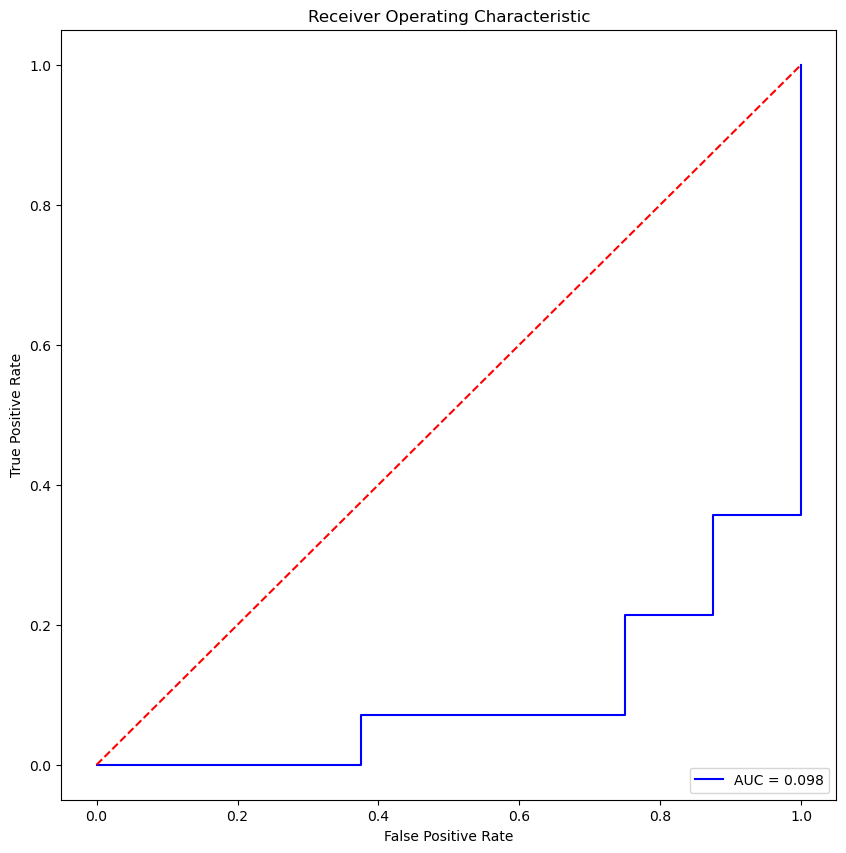

In [41]:
# Compute Receiver operating characteristic
fpr, tpr, thresholds = metrics.roc_curve(model_eval.sample_label,
                                         model_eval.mean_spectra_prediction)
# Compute Area Under the Curve
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve + AUC
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, "b", label=f"AUC = {roc_auc:.3f}")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.show()

Next, let's plot the precision-recall curve:

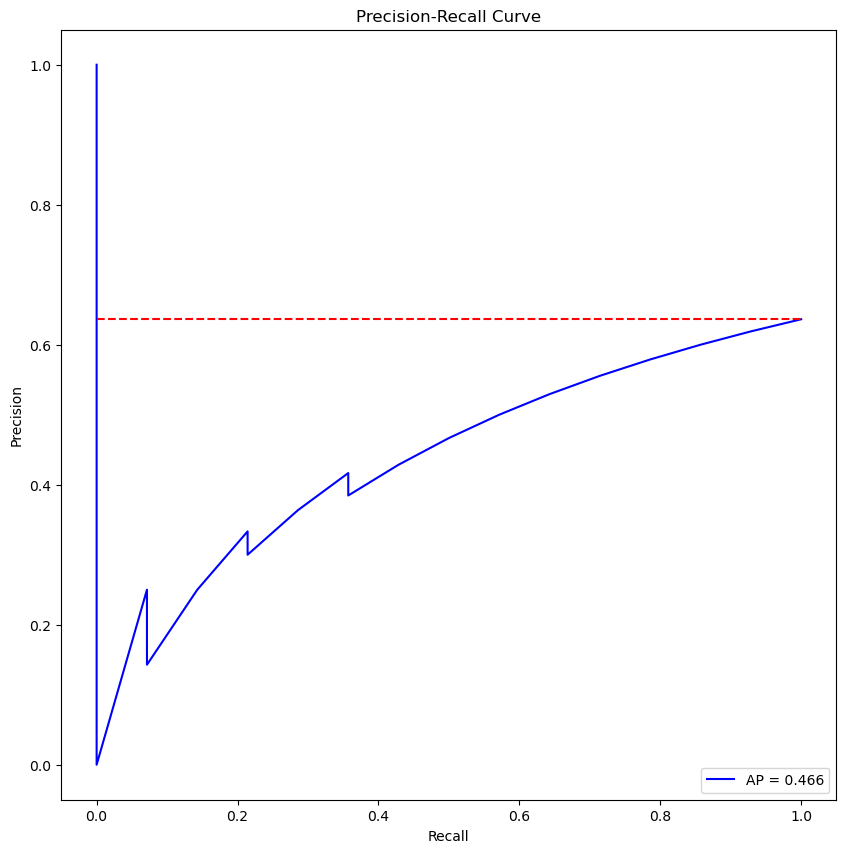

In [42]:
# Compute Receiver operating characteristic
precision, recall, thresholds = metrics.precision_recall_curve(
  model_eval.sample_label, model_eval.mean_spectra_prediction)
# Compute Area Under the Curve
pr_avg_precision = metrics.average_precision_score(
  model_eval.sample_label, model_eval.mean_spectra_prediction
)
# calculate the no skill line as the proportion of the positive class
no_skill = sum(model_eval.sample_label==1) / len(model_eval.sample_label)

# Plot ROC curve + AUC
plt.figure(figsize=(10, 10))
plt.plot(recall, precision, "b", label=f"AP = {pr_avg_precision:.3f}")
plt.legend(loc="lower right")
plt.plot([0, 1], [no_skill, no_skill], "r--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall Curve")
plt.show()

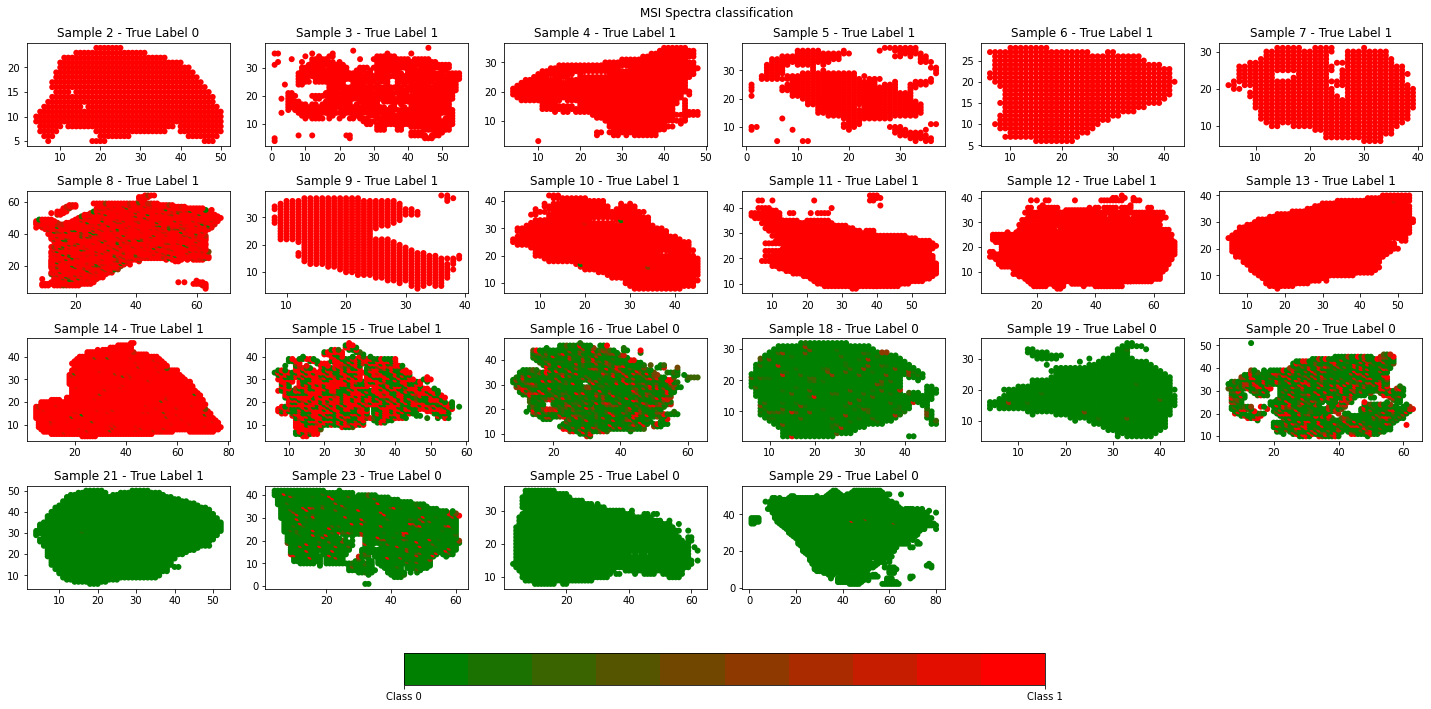

In [16]:
# Create custom binary color bar
colors = ["green", "red"]
cm = LinearSegmentedColormap.from_list("Class", colors, N=10)

# Create subplots
fig, axes = plt.subplots(4, 6, figsize=(20, 10))

# Get all samples
keys = predictions.keys()

# Loop over each sample and subplot
for key, ax in zip(keys, axes.flat[:len(keys)]):
  # Plot samples spectra's predictions
  im = ax.scatter(x_coordinates[(sample_numbers == key) & is_tissue],
                  y_coordinates[(sample_numbers == key) & is_tissue],
                  c=predictions[key],
                  cmap=cm,
                  edgecolor=['none'],
                  vmin=0,
                  vmax=1,
                  linewidths=0)
  #
  ax.set_title(f"Sample {key} - True Label {true_labels[key][0]}")
# Loop over non used subplots
for ax in axes.flat[len(keys):]:
  # Delete subplot
  fig.delaxes(ax)

# Add title
fig.suptitle("MSI Spectra classification")

# Sort plot layout
fig.tight_layout(h_pad=2, w_pad=1)

# Add one color bar
cbar = fig.colorbar(im,
                    ax=axes.ravel().tolist(),
                    location="bottom",
                    orientation="horizontal",
                    fraction=0.05,
                    pad=0.10)
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["Class 0", "Class 1"])

# Show plot
plt.show()

### ***Leave one sample out classification evaluation - non tissue spectra's:***

Next, let's get the prediction of each of left out sample non tissue spectra's:

In [17]:
# Define dict for saving predictions and true labels
predictions = {}
true_labels = {}

# Loop over each sample number
for exclude_sample in tqdm(np.unique(sample_numbers)):
  # Clear graph
  K.clear_session()
  gc.collect()
  
  # Create filter for training data
  test_filter = ((sample_numbers == exclude_sample) & ~is_tissue)

  # Get indexes of all data
  indexes = np.arange(len(sample_numbers))

  # Create test data generator
  test_generator = create_ds(indexes[test_filter], BATCH_SIZE)

  # Get saved model path
  model_path = os.path.join(MODELS_PATH, f"excluded_{exclude_sample}/")

  # Load model
  classification_model = tf.keras.models.load_model(model_path)

  # Get predictions
  predictions[exclude_sample] = classification_model.predict(x=test_generator)
  
  # Get corresponding true labels
  true_labels[exclude_sample] = labels[test_filter]

  # Clean model for next iteration
  classification_model = None

100%|██████████| 22/22 [01:55<00:00,  5.27s/it]


Next, let's get some statistics about each left out sample predictions:

In [18]:
# Set pandas display format
pd.options.display.float_format = '{:.10f}'.format
# Create datafrmae of each sample left out
model_eval = pd.DataFrame({"sample_left_out": predictions.keys()})
# Get the minimum prediction value of each sample left out
model_eval["min_spectra_prediction"] = model_eval.sample_left_out.apply(
    lambda key: predictions[key].min())
# Get the maximum prediction value of each sample left out
model_eval["max_spectra_prediction"] = model_eval.sample_left_out.apply(
    lambda key: predictions[key].max())
# Get the median prediction value of each sample left out
model_eval["median_spectra_prediction"] = model_eval.sample_left_out.apply(
    lambda key: np.median(predictions[key]))
# Get the mean prediction value of each sample left out
model_eval["mean_spectra_prediction"] = model_eval.sample_left_out.apply(
    lambda key: predictions[key].mean())
# Get the standard deviation prediction value of each sample left out
model_eval["std_spectra_prediction"] = model_eval.sample_left_out.apply(
    lambda key: predictions[key].std())
# Get the sample prediction = majority rule of sample spectra's prediction
model_eval["sample_label"] = model_eval.sample_left_out.apply(
    lambda key: true_labels[key][0])
# Get the sample true label
model_eval["sample_prediction"] = (model_eval.mean_spectra_prediction >
                                   0.5).astype(int)
# Print statistics
model_eval

sample_left_out  min_spectra_prediction  max_spectra_prediction  \
0                 2            0.9999806881            0.9999998808   
1                 3            0.9757853150            0.9999355078   
2                 4            0.9999990463            1.0000000000   
3                 5            0.9999997616            1.0000000000   
4                 6            0.9999895096            0.9999992847   
5                 7            0.9999920130            0.9999991655   
6                 8            0.9890795350            1.0000000000   
7                 9            0.9983017445            0.9999998808   
8                10            0.9993095398            1.0000000000   
9                11            0.7356858850            1.0000000000   
10               12            0.9092565179            0.9999969006   
11               13            0.2142871469            1.0000000000   
12               14            0.3283411264            0.9999996424   
13               15            0.0000000000            0.0150283147   
14               16            0.0002774537            0.9978281856   
15               18            0.0005485553            0.9513503909   
16               19            0.0001227193            0.9434845448   
17               20            0.0000000074            0.8782429695   
18               21            0.0000000096            0.6502271295   
19               23            0.0000000000            0.0024096007   
20               25            0.0000000000            0.0029540267   
21               29            0.0000000000            0.0094233593   

    median_spectra_prediction  mean_spectra_prediction  \
0                0.9999994040             0.9999990463   
1                0.9993009567             0.9988535047   
2                1.0000000000             1.0000000000   
3                1.0000000000             1.0000000000   
4                0.9999985695             0.9999981523   
5                0.9999977350             0.9999975562   
6                0.9999980927             0.9999779463   
7                0.9999812841             0.9999669194   
8                0.9999506474             0.9999371171   
9                0.9999992847             0.9997683764   
10               0.9999513626             0.9991284609   
11               0.9997804761             0.9934213161   
12               0.9997295737             0.9933677912   
13               0.0000000007             0.0000213368   
14               0.3734221160             0.4336470664   
15               0.3165111542             0.3823024035   
16               0.0466509089             0.2070209533   
17               0.0001321637             0.0052240682   
18               0.0000334138             0.0017846420   
19               0.0000000006             0.0000093075   
20               0.0000000952             0.0000164230   
21               0.0000000064             0.0000184562   

    std_spectra_prediction  sample_label  sample_prediction  
0             0.0000016060             0                  1  
1             0.0014959319             1                  1  
2             0.0000000392             1                  1  
3             0.0000000417             1                  1  
4             0.0000012956             1                  1  
5             0.0000010435             1                  1  
6             0.0002735944             1                  1  
7             0.0000711928             1                  1  
8             0.0000656189             1                  1  
9             0.0070001893             1                  1  
10            0.0029519072             1                  1  
11            0.0416295826             1                  1  
12            0.0313693658             1                  1  
13            0.0004852874             1                  0  
14            0.3645314574             0                  0  
15            0.3080493510             0   

Next, let's evaluate the classification performance:

In [19]:
# Get accuracy
accuracy = metrics.accuracy_score(model_eval.sample_label,
                                  model_eval.sample_prediction)
# Get balanced accuracy
b_accuracy = metrics.balanced_accuracy_score(model_eval.sample_label,
                                             model_eval.sample_prediction)
# Get precision
precision = metrics.precision_score(model_eval.sample_label,
                                    model_eval.sample_prediction)
# Get recall
recall = metrics.recall_score(model_eval.sample_label,
                              model_eval.sample_prediction)
# Get  f1 score
f1 = metrics.f1_score(model_eval.sample_label, model_eval.sample_prediction)

# Print metrics
print(f"Accuracy: {accuracy:.3f}")
print(f"Balanced  Accuracy: {b_accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 score: {f1:.3f}")

Accuracy: 0.864
Balanced  Accuracy: 0.866
Precision: 0.923
Recall: 0.857
F1 score: 0.889


Next, let's plot the roc curve:

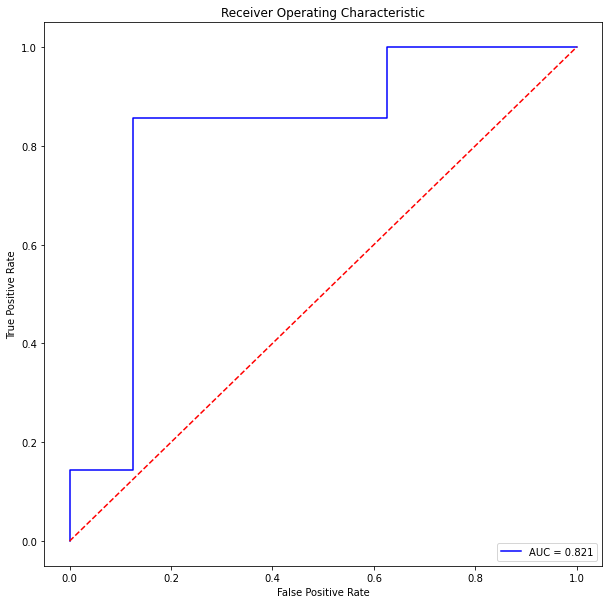

In [20]:
# Compute Receiver operating characteristic
fpr, tpr, thresholds = metrics.roc_curve(model_eval.sample_label,
                                         model_eval.mean_spectra_prediction)
# Compute Area Under the Curve
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve + AUC
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, "b", label=f"AUC = {roc_auc:.3f}")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.show()

Next, let's plot the precision-recall curve:

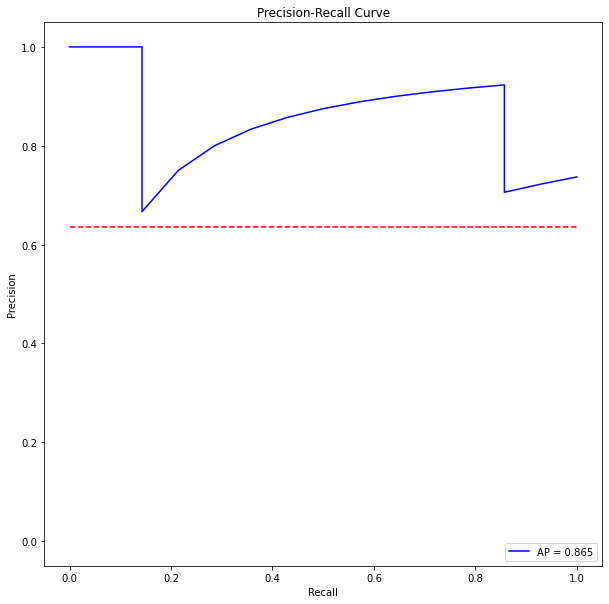

In [21]:
# Compute Receiver operating characteristic
precision, recall, thresholds = metrics.precision_recall_curve(
  model_eval.sample_label, model_eval.mean_spectra_prediction)
# Compute Area Under the Curve
pr_avg_precision = metrics.average_precision_score(
  model_eval.sample_label, model_eval.mean_spectra_prediction
)
# calculate the no skill line as the proportion of the positive class
no_skill = sum(model_eval.sample_label==1) / len(model_eval.sample_label)

# Plot ROC curve + AUC
plt.figure(figsize=(10, 10))
plt.plot(recall, precision, "b", label=f"AP = {pr_avg_precision:.3f}")
plt.legend(loc="lower right")
plt.plot([0, 1], [no_skill, no_skill], "r--")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Precision-Recall Curve")
plt.show()

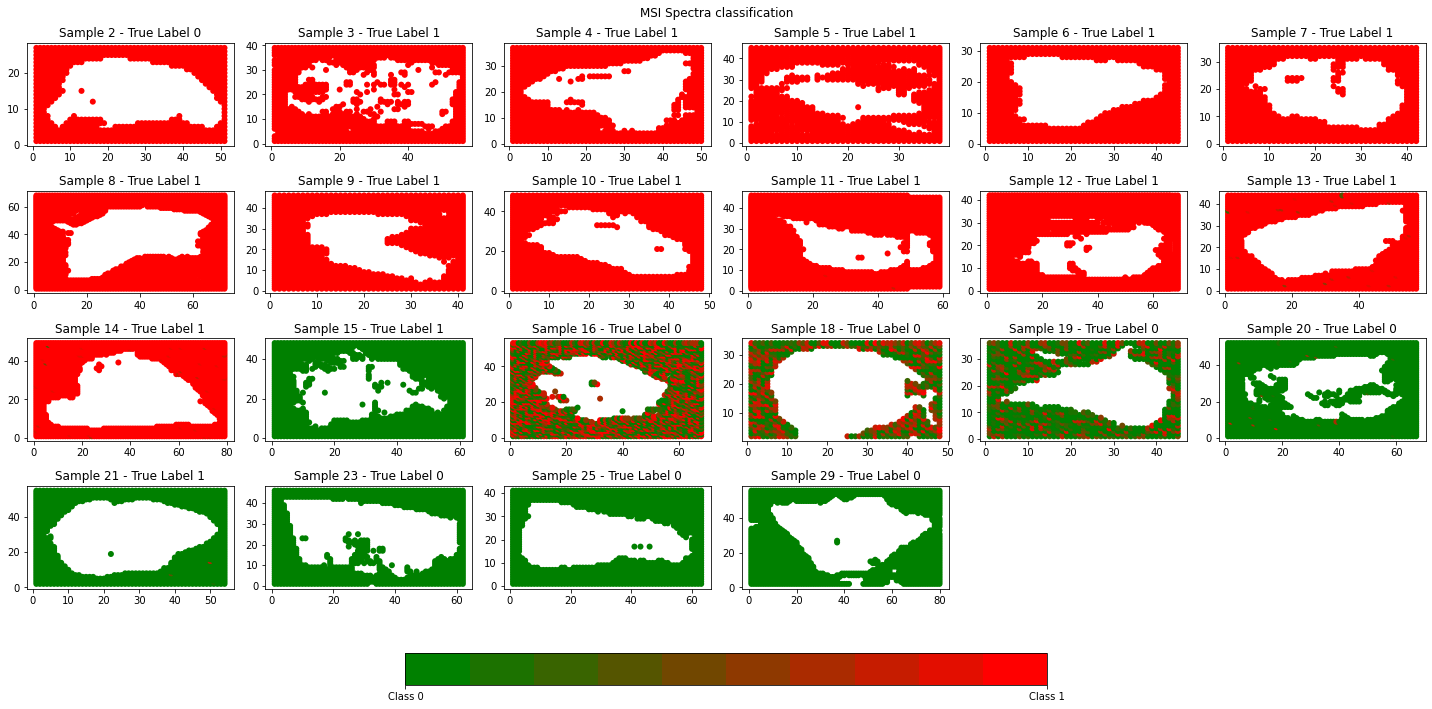

In [22]:
# Create custom binary color bar
colors = ["green", "red"]
cm = LinearSegmentedColormap.from_list("Class", colors, N=10)

# Create subplots
fig, axes = plt.subplots(4, 6, figsize=(20, 10))

# Get all samples
keys = predictions.keys()

# Loop over each sample and subplot
for key, ax in zip(keys, axes.flat[:len(keys)]):
  # Plot samples spectra's predictions
  im = ax.scatter(x_coordinates[(sample_numbers == key) & ~is_tissue],
                  y_coordinates[(sample_numbers == key) & ~is_tissue],
                  c=predictions[key],
                  cmap=cm,
                  edgecolor=['none'],
                  vmin=0,
                  vmax=1,
                  linewidths=0)
  #
  ax.set_title(f"Sample {key} - True Label {true_labels[key][0]}")
# Loop over non used subplots
for ax in axes.flat[len(keys):]:
  # Delete subplot
  fig.delaxes(ax)

# Add title
fig.suptitle("MSI Spectra classification")

# Sort plot layout
fig.tight_layout(h_pad=2, w_pad=1)

# Add one color bar
cbar = fig.colorbar(im,
                    ax=axes.ravel().tolist(),
                    location="bottom",
                    orientation="horizontal",
                    fraction=0.05,
                    pad=0.10)
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["Class 0", "Class 1"])

# Show plot
plt.show()

### ***MSI parsers closing:***

Next, let"s close MSI parsers:

In [23]:
# Closing parsers
for reader in parsers.values():
  if reader.m:
    reader.m.close()